## Importing Libraries

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix, classification_report
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sv255\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sv255\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sv255\AppData\Roaming\nltk_data...


## Reading the data

In [87]:
data = pd.read_csv('../data_given/BBC News Train.csv')

In [88]:
data.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [89]:
data.shape

(1490, 3)

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


## Checking for null values

In [91]:
data.isnull().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

## Checking for Duplicate values

In [92]:
data.duplicated().sum()

0

In [93]:
data['Category_ID'] = data['Category'].factorize(sort= True)[0]

In [94]:
data.head()

,ArticleId,Text,Category,Category_ID
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
3,1976,lifestyle governs mobile choice faster bett...,tech,4
4,917,enron bosses in $168m payout eighteen former e...,business,0


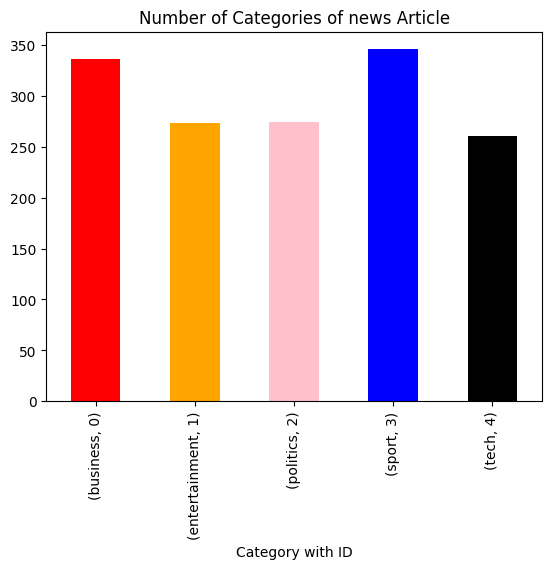

In [95]:
data.groupby('Category').Category_ID.value_counts().plot(kind = 'bar', color = ['red', 'orange', 'pink', 'blue', 'black'])
plt.title('Number of Categories of news Article')
plt.xlabel('Category with ID')
plt.show()

In [96]:
perc_of_values = [round((i/data.shape[0]) * 100,2) for i in data.groupby('Category').Category_ID.value_counts().values]

In [97]:
data.groupby('Category').Category_ID.value_counts()

Category       Category_ID
business       0              336
entertainment  1              273
politics       2              274
sport          3              346
tech           4              261
Name: Category_ID, dtype: int64

In [98]:
categories_info = dict(data.groupby('Category').Category_ID.value_counts().index)

In [99]:
perc_of_values

[22.55, 18.32, 18.39, 23.22, 17.52]

In [100]:
labels = ['business','entertainment','politics', 'sport','tech' ]

In [101]:
colors = ['lightgreen']

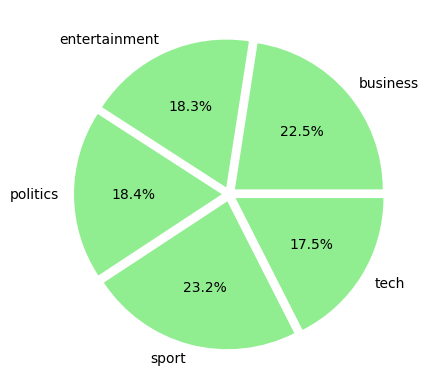

In [102]:
plt.pie(perc_of_values, labels = labels, colors = colors, explode = (0.05, 0.05, 0.05, 0.05,0.05), autopct='%1.1f%%')
plt.show()

## Removing Stopwords

In [103]:
data.head()

,ArticleId,Text,Category,Category_ID
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
3,1976,lifestyle governs mobile choice faster bett...,tech,4
4,917,enron bosses in $168m payout eighteen former e...,business,0


In [104]:
from wordcloud import WordCloud

In [105]:
stop = set(stopwords.words('english'))

In [106]:
buisness =  data[data['Category'] == 'buisness']
buisness =  data['Text']
entertainment =  data[data['Category'] == 'entertainment']
entertainment =  data['Text']
politics =  data[data['Category'] == 'politics']
politics =  data['Text']
sport =  data[data['Category'] == 'sport']
sport =  data['Text']
tech =  data[data['Category'] == 'tech']
tech =  data['Text']

In [107]:
def create_wordcloud(text_data):
    words =  ' '.join(text_data)
    cleaned_words =  ' '.join([word for word in words.split() if word != 'news' and word != 'news'])
    wordcloud = WordCloud(stopwords =  stop,
                          background_color = 'white',
                          width =  2500,
                          height = 2500).generate(cleaned_words)
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud)


In [108]:
# print('buisness stopwords')
# create_wordcloud(buisness)

In [109]:
# print('entertainment stopwords')
# create_wordcloud(entertainment)

In [110]:
# print('politics stopwords')
# create_wordcloud(politics)

In [111]:
# print('sport stopwords')
# create_wordcloud(sport)

In [112]:
# print('tech stopwords')
# create_wordcloud(tech)

In [113]:
buisness[0]

'worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used by worldcom. mr ebb

## Removing Special Characters

In [114]:
def rm_special_char(text):
    new_text = ''
    for x in text:
        if x.isalnum():
            new_text = new_text + x
        else:
            new_text = new_text + ' '
    return new_text

In [115]:
data.head()

,ArticleId,Text,Category,Category_ID
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
3,1976,lifestyle governs mobile choice faster bett...,tech,4
4,917,enron bosses in $168m payout eighteen former e...,business,0


In [116]:
rm_special_char(buisness[0])

'worldcom ex boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness   cynthia cooper  worldcom s ex head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002  her warnings led to the collapse of the firm following the discovery of an  11bn   5 7bn  accounting fraud  mr ebbers has pleaded not guilty to charges of fraud and conspiracy   prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates  but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002  she said andersen had given a  green light  to the procedures and practices used by worldcom  mr ebb

In [117]:
data['Text'] = data['Text'].apply(rm_special_char)

In [118]:
data.head()

,ArticleId,Text,Category,Category_ID
0,1833,worldcom ex boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
3,1976,lifestyle governs mobile choice faster bett...,tech,4
4,917,enron bosses in 168m payout eighteen former e...,business,0


## Removing Stopwords

In [119]:
def remove_stopwords(text):
    stopword = stopwords.words('english')
    words = nltk.word_tokenize(text)
    return [word for word in words if words not in stopword]

In [120]:
data['Text'] = data['Text'].apply(remove_stopwords)

In [121]:
data.head()

,ArticleId,Text,Category,Category_ID
0,1833,"[worldcom, ex, boss, launches, defence, lawyer...",business,0
1,154,"[german, business, confidence, slides, german,...",business,0
2,1101,"[bbc, poll, indicates, economic, gloom, citize...",business,0
3,1976,"[lifestyle, governs, mobile, choice, faster, b...",tech,4
4,917,"[enron, bosses, in, 168m, payout, eighteen, fo...",business,0


## Lemmatization

In [122]:
def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in text])

In [123]:
data['Text'] = data['Text'].apply(lemmatize)

In [124]:
data.head()

,ArticleId,Text,Category,Category_ID
0,1833,worldcom ex bos launch defence lawyer defendin...,business,0
1,154,german business confidence slide german busine...,business,0
2,1101,bbc poll indicates economic gloom citizen in a...,business,0
3,1976,lifestyle governs mobile choice faster better ...,tech,4
4,917,enron boss in 168m payout eighteen former enro...,business,0


In [125]:
data['Text'][0]

'worldcom ex bos launch defence lawyer defending former worldcom chief bernie ebbers against a battery of fraud charge have called a company whistleblower a their first witness cynthia cooper worldcom s ex head of internal accounting alerted director to irregular accounting practice at the u telecom giant in 2002 her warning led to the collapse of the firm following the discovery of an 11bn 5 7bn accounting fraud mr ebbers ha pleaded not guilty to charge of fraud and conspiracy prosecution lawyer have argued that mr ebbers orchestrated a series of accounting trick at worldcom ordering employee to hide expense and inflate revenue to meet wall street earnings estimate but m cooper who now run her own consulting business told a jury in new york on wednesday that external auditor arthur andersen had approved worldcom s accounting in early 2001 and 2002 she said andersen had given a green light to the procedure and practice used by worldcom mr ebber s lawyer have said he wa unaware of the f

## Bag of Words Model

In [126]:
x = data.Text.values

In [127]:
y = data.Category_ID.values

In [128]:
cv = CountVectorizer(max_features=5000)

In [129]:
x =  cv.fit_transform(x).toarray()

In [130]:
import pickle
with open('../notebooks/cv.pkl', 'wb') as file:
    pickle.dump(cv, file)

In [131]:
import pickle
with open('../notebooks/cv.pkl', 'rb') as file:
    cv_trns = pickle.load(file)

In [132]:
print(x.shape, y.shape)

(1490, 5000) (1490,)


## Train Test Split

In [133]:
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size = 0.25, random_state=0, shuffle=True)

In [134]:
x_train.shape

(1117, 5000)

In [135]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [136]:
def train_model_classification(models, x_train, x_test, y_train, y_test, transformed_cv):
    model_names = []
    model_accuracy = []
    model_precision = []
    model_recall = []
    model_f1 = []
    for model in range(len(models)):   
        classifier = models[model]
        model_name = type(classifier).__name__
        model_names.append(model_name)
        classifier.fit(x_train, y_train)
        y_pred = classifier.predict(x_test)
        accuracy = round(accuracy_score(y_test, y_pred),2)
        precision = round(precision_score(y_test, y_pred, average='micro'),2)
        recall = round(recall_score(y_test, y_pred, average='micro'),2)
        f1 = round(f1_score(y_test, y_pred, average='micro'),2)
        cr = classification_report(y_test, y_pred)
        model_accuracy.append(accuracy)
        model_precision.append(precision)
        model_recall.append(recall)
        model_f1.append(f1)
        print(f"{'-'*30} {model_name} {'-'*30}")
        print("Accuracy Score : {:.4f}".format(accuracy))
        print("Precision Score : {:.4f}".format(precision))
        print("Recall Score : {:.4f}".format(recall))
        print("F1 Score : {:.4f}".format(f1))
        print(f'Classification_report : {cr}')
        plt.title(f'{model_name} confusion matrix')
        plot_confusion_matrix(classifier,x_test, y_test)
        print('*'*80)

    result_df = pd.DataFrame(list(zip(model_names, model_accuracy, model_precision, model_recall, model_f1)), \
                             columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']) 

    return result_df    

In [137]:
classification_models = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), XGBClassifier(), SVC(), DecisionTreeClassifier(), GaussianNB(), XGBClassifier()]


------------------------------ LogisticRegression ------------------------------
Accuracy Score : 0.9700
Precision Score : 0.9700
Recall Score : 0.9700
F1 Score : 0.9700
Classification_report :               precision    recall  f1-score   support

           0       0.98      0.95      0.96        86
           1       0.95      0.99      0.97        73
           2       0.97      0.94      0.95        63
           3       0.97      0.99      0.98        84
           4       0.97      0.96      0.96        67

    accuracy                           0.97       373
   macro avg       0.97      0.96      0.96       373
weighted avg       0.97      0.97      0.97       373

********************************************************************************
------------------------------ KNeighborsClassifier ------------------------------
Accuracy Score : 0.7400
Precision Score : 0.7400
Recall Score : 0.7400
F1 Score : 0.7400
Classification_report :               precision    recall  f1-sc

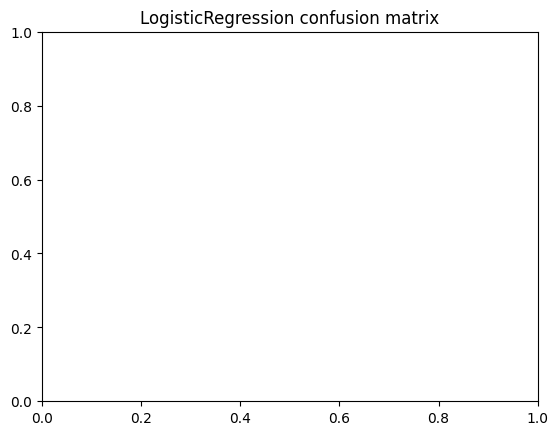

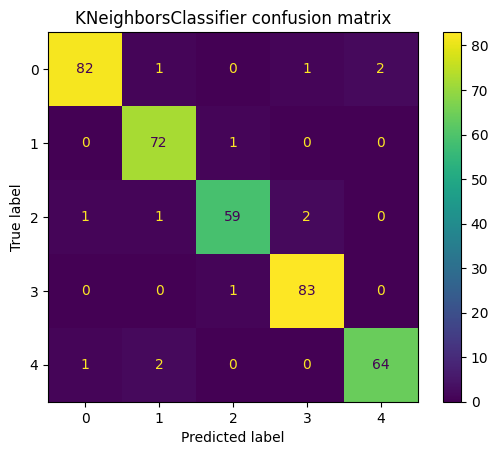

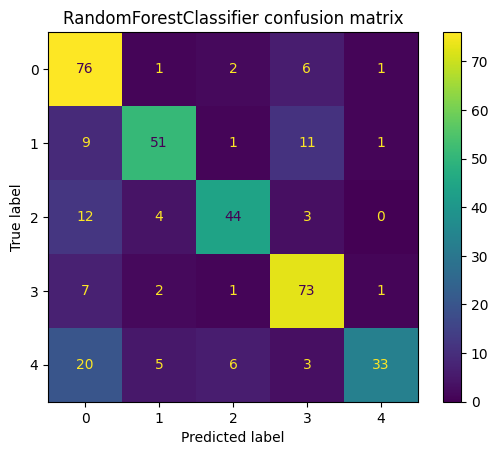

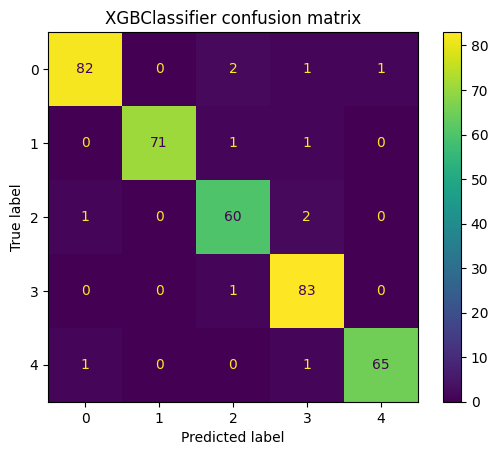

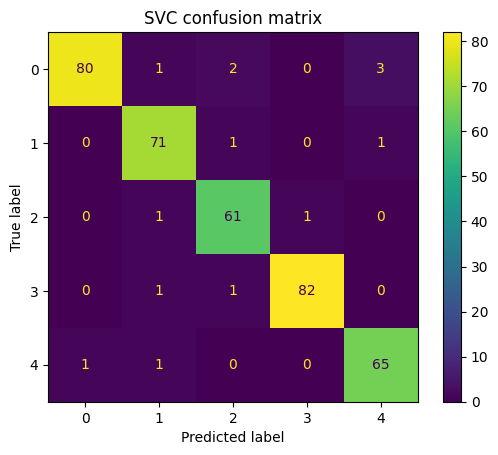

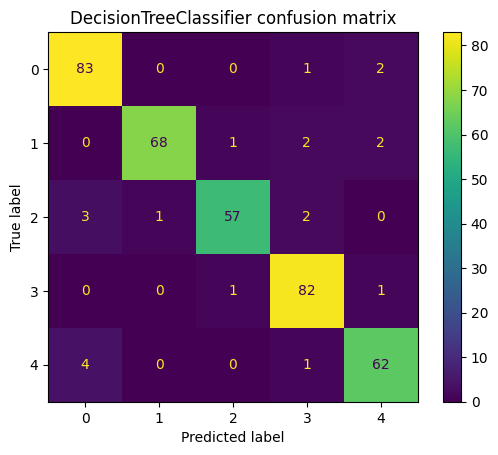

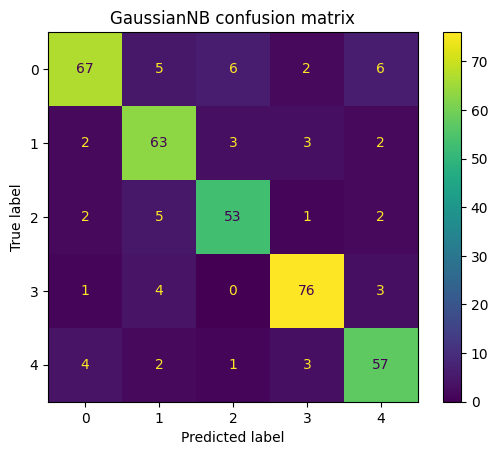

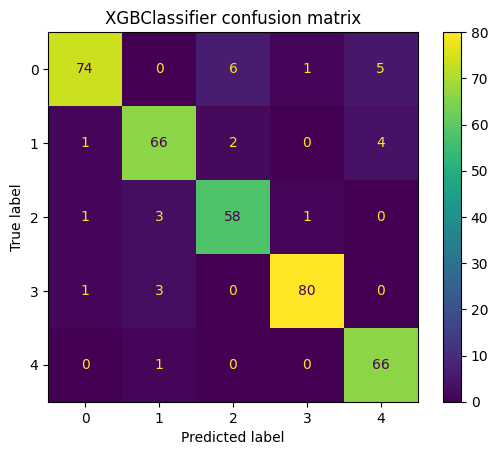

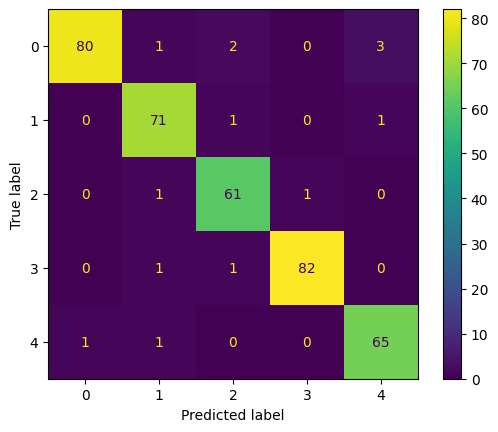

In [138]:
model_results = train_model_classification(models = classification_models, x_train=x_train, x_test = x_test, y_train = y_train, y_test=y_test, transformed_cv=cv)

In [139]:
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,LogisticRegression,0.97,0.97,0.97,0.97
1,KNeighborsClassifier,0.74,0.74,0.74,0.74
2,RandomForestClassifier,0.97,0.97,0.97,0.97
3,XGBClassifier,0.96,0.96,0.96,0.96
4,SVC,0.94,0.94,0.94,0.94
5,DecisionTreeClassifier,0.85,0.85,0.85,0.85
6,GaussianNB,0.92,0.92,0.92,0.92
7,XGBClassifier,0.96,0.96,0.96,0.96


## Using Random Forest Model

In [140]:
rfc =  RandomForestClassifier()

In [141]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [142]:
y_pred = rfc.predict(x_test)

In [143]:
accuracy = accuracy_score(y_test, y_pred)

In [144]:
accuracy

0.9624664879356568

In [145]:
precision = precision_score(y_test, y_pred, average ='micro')

In [146]:
precision

0.9624664879356568

In [147]:
recall = recall_score(y_test, y_pred, average = 'micro')

In [148]:
recall

0.9624664879356568

In [149]:
f1 = f1_score(y_test, y_pred, average ='micro')

In [150]:
f1

0.9624664879356568

In [151]:
cv_transform =  cv.transform(['Hour ago, I contemplated retirement for a lot of reasons. I felt like people were not sensitive enough to my injuries. I felt like a lot of people were backed, why not me? I have done no less. I have won a lot of games for the team, and I am not feeling backed, said Ashwin'])

In [152]:
for i in categories_info.keys():
    if categories_info[i] == rfc.predict(cv_transform):
        print(i)

sport


## Using XGBoost Classifier Model

In [159]:
xgbc =  XGBClassifier()

In [160]:
xgbc.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [161]:
y_pred = xgbc.predict(x_test)

In [162]:
accuracy = accuracy_score(y_test, y_pred)

In [163]:
accuracy

0.9624664879356568

In [164]:
precision = precision_score(y_test, y_pred, average ='micro')

In [165]:
precision

0.9624664879356568

In [166]:
recall = recall_score(y_test, y_pred, average = 'micro')

In [167]:
recall

0.9624664879356568

In [168]:
f1 = f1_score(y_test, y_pred, average ='micro')

In [169]:
f1

0.9624664879356568

In [170]:
cv_transform =  cv.transform(['Hour ago, I contemplated retirement for a lot of reasons. I felt like people were not sensitive enough to my injuries. I felt like a lot of people were backed, why not me? I have done no less. I have won a lot of games for the team, and I am not feeling backed, said Ashwin'])

In [171]:
for i in categories_info.keys():
    if categories_info[i] == xgbc.predict(cv_transform):
        print(i)

sport


In [153]:
categories_info

{'business': 0, 'entertainment': 1, 'politics': 2, 'sport': 3, 'tech': 4}

In [172]:
def new_classify(text, predictor):
    cv_transform =  cv_trns.transform([text])
    for i in categories_info.keys():
        if categories_info[i] == predictor.predict(cv_transform):
            return i


In [155]:
test1 = 'I own a company that values nearly 2 billion dollars. But due to some financial breakdowns, i want to sell my company'

In [156]:
test2 = 'I love playing outdoor games. I was a national level Tennis player'

In [ ]:
sports_test = ' Needing a response to keep their season alive, the Seattle Kraken found exactly that in a 6-3 series-tying win Saturday against the Dallas Stars in Game 6 of this Western Conference semifinal at Climate Pledge Arena. A number of items allowed the Kraken to break out for six goals, prompt the Stars to pull star goaltender Jake Oettinger and ultimately force a Game 7 slated for Monday at the American Airlines Center in Dallas. For the Stars, a Game 7 win would see them advance to the Western Conference final for the second time in four seasons. As for the Kraken, winning Game 7 would see the second-year franchise reach the conference finals for the first time in team history. "We were ready tonight. I feel like the last couple games, they were the ready team at the start," said Kraken winger Eeli Tolvanen, who finished with a goal and three points. "I think that was the big key today. All four lines were ready to play and showed'

In [ ]:
tech_test = "And yet it's really hard to complain about the lack of advancements with this Android smartphone. In the US, there's a dearth of feature-packed midrange and budget phones: You'd be amazed at the kind of hardware you can get elsewhere in the world for a few hundred bucks. Still, what Samsung offers here is a compelling, well-rounded package you'll be able to keep using for several years, unlike many other sub-$450 phones that end software support after one to two."

In [ ]:
buissness_test = "Airlines scheduled a near-record 51,000 flights from June through August from the U.S. to Europe, according to airline data firm Cirium. The number of scheduled seats is the highest since 2018. Despite that increase in capacity across the Atlantic, fares are up sharply as airlines test travelers’ appetites for trips abroad. According to Hopper, U.S.-to-Europe roundtrip flights are going for an average of $1,032, up 35% from last year and 24% from 2019. Average domestic U.S. airfare, by contrast, is down 15% from a year ago to $286 for a round trip, roughly in line with pre-pandemic levels."

In [ ]:
ent_test = "A showcase for stories by and about people of color, women, the LGBTQ+ community and people with disabilities were, for me, one of the highlight’s of SeriesFest. The importance of inclusive storytelling for audiences may be one of the reasons CBS reversed course on a decision to cancel one of its more diverse shows, “S.W.A.T.” Its star, Shemar Moore, headlines in one of the few series on network TV (meaning, outside of streaming) to feature a Black male lead. “We have listened to our viewers and their outpouring of passion for ‘S.W.A.T.’ and we have reached an agreement to renew it for a final season of 13 episodes to air during the 2023-2024 broadcast year,” CBS Entertainment president Amy Reisenbach and Sony Pictures Television Studios president Katherine Pope said in a joint statement this week."

In [ ]:
politics_test = "After the bulk of the results were announced on Saturday, Chief Minister Yogi Adityanath thanked the people of Uttar Pradesh and congratulated BJP workers for forming a 'triple-engine government' in the state. In the two-phase urban local body elections, voting was also held to elect 198 chairpersons and 5,260 members of nagar palika parishads, 542 chairpersons of nagar panchayats and 7,104 members of nagar panchayats."

In [157]:
new_classify(test1)

'sport'

In [158]:
new_classify(test2)

'sport'